# World Happiness Report Project

# Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 


You need to predict the happiness score considering all the other factors mentioned in the dataset.

In [1]:
#Importing necessary libraries for analysis:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#Downloading the raw data and loading into dataframe with the help of pandas library:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")


In [3]:
#For viewing the first 20 columns in given dataset
df.head(20)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


# 1) EXPLORING DATASET

In [4]:
#To know about the no of rows and columns in the dataset
df.shape

(158, 12)

In [5]:
#To know more about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

There are 12 columns in the dataset.We will try to know which columns are categorical and numerical columns.The numerical columns are Happiness Rank,Happiness Score,Standard Error,Econo,y (GDP per Capita),Family,Health,Freedom,Trust,Generosity,Dystopia Residual.
The Categorical columns are Country,Region,

In [6]:
#To know more about the categorical column and catogories count inside it:
df["Country"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

There are many categories in the Country column.

In [7]:
#Analysing the Region column:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

There are so many categories in the region column also. we will further analyse these columns.From this part we got some basic information about the dataset. 

# 2)ANALYSING THE DATASET 

1)Identifying the missing values:

In [8]:
#TO know about the missing values in the given dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In this dataset there are no missing values. We can proceed the dataset for futher statistical and visualisation analysis.

In [9]:
#To know about statistical descirption of the dataset:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


From this we can observe that the count of all the columns remains same so there is no missing values,the mean and 50% datas also have related values but there is some skewness in the dataset.From observing 75% and max we can say that there some outliers in the standard error,Trust(Government Corruption),


# 3)DATASET VISUALIZATION¶

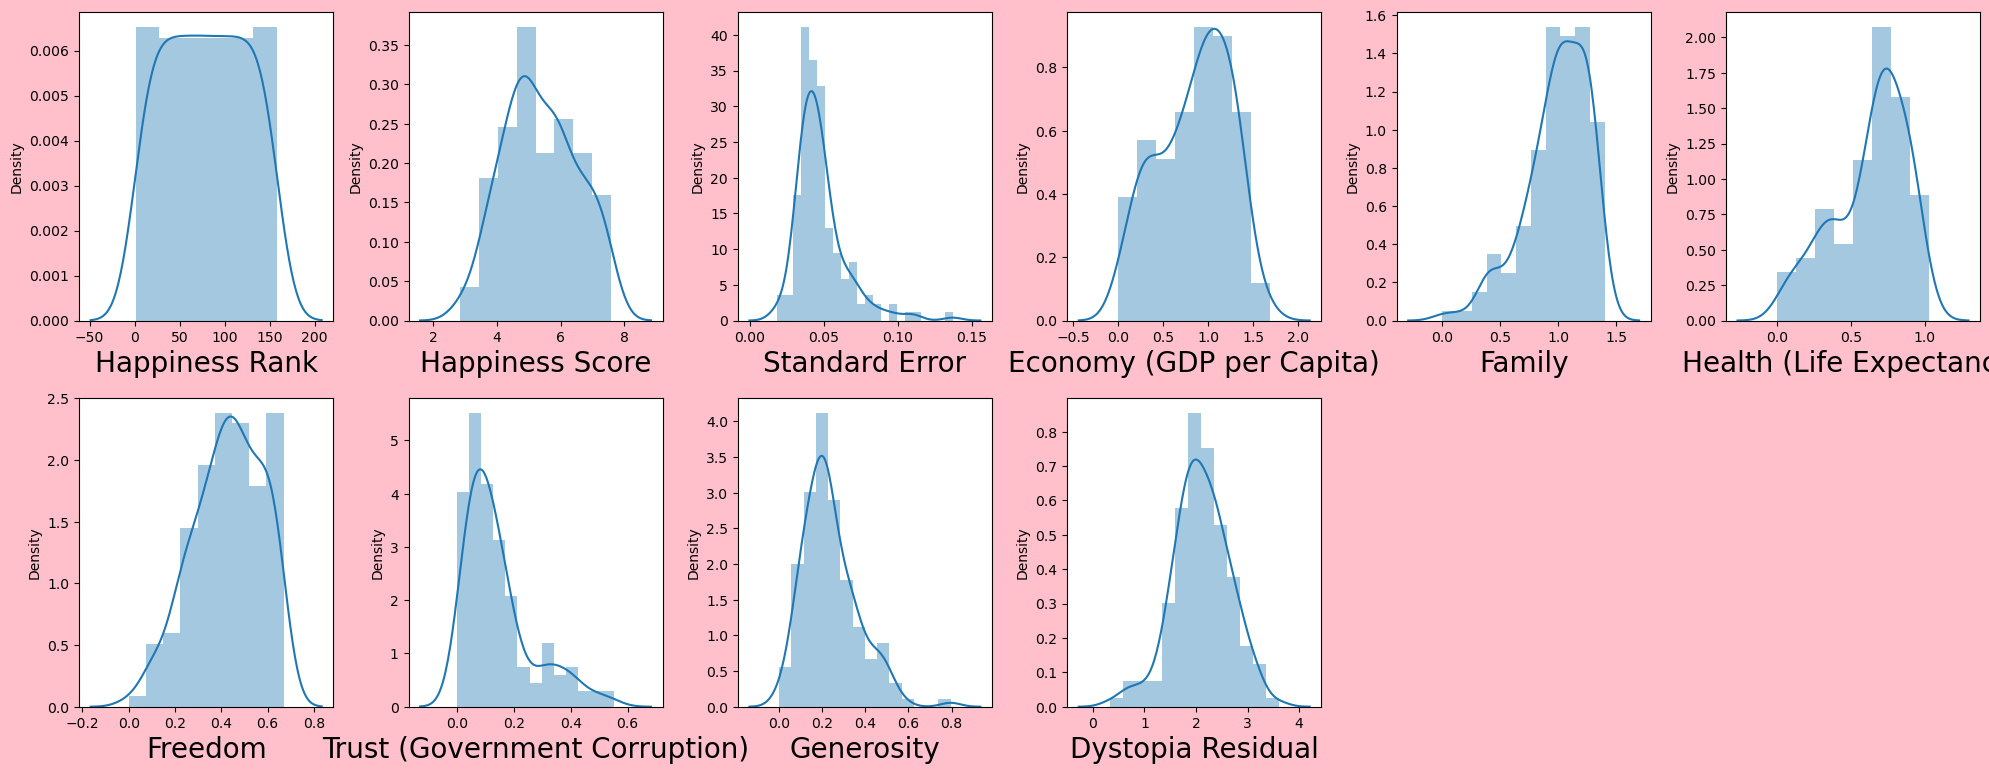

In [10]:
#to see the distribution among the columns:
df1=df.drop(columns=["Country","Region"])
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df1:
    if plotnumber<=11:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

from this we can say happiness rank- normal distribution,other that all the columns slightly different unsymmentric distribution we standardize the values.

In [11]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

From this observation we can say than standatd error,family,Trust(Government Corruption),Generosity these 4 columns are highly skewed.we have handle the skewness.

In [12]:
#removing the skewness using the cuberoot method:
df["Trust (Government Corruption)"]=np.cbrt(df["Trust (Government Corruption)"])
df["Standard Error"]=np.cbrt(df["Standard Error"])
df["Generosity"]=np.cbrt(df["Generosity"])

In [13]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.979748
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.011932
Generosity                      -0.961079
Dystopia Residual               -0.238911
dtype: float64

Now the data are not highly skewed moderately skewed.We can further proceed the dataset.

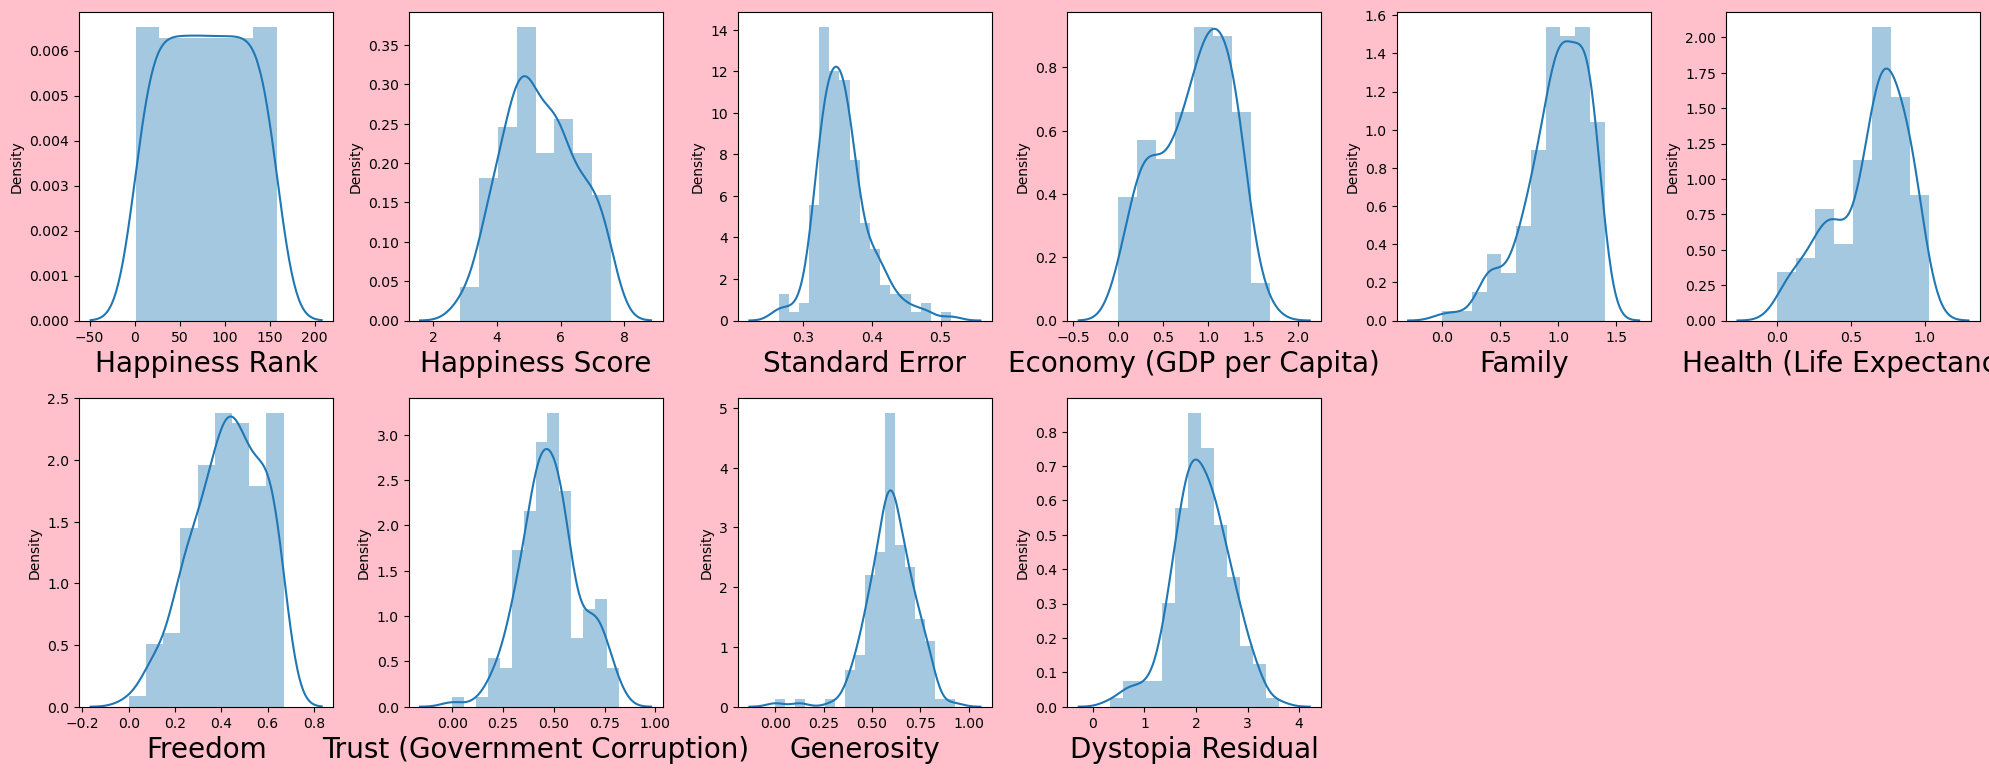

In [14]:
#to see the distribution among the columns:
df1=df.drop(columns=["Country","Region"])
plt.figure(figsize=(20,15),facecolor="pink")
plotnumber=1
for column in df1:
    if plotnumber<=11:
        ax=plt.subplot(4,6,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

The graaphical representation also gives fairly symmentrical distribution.

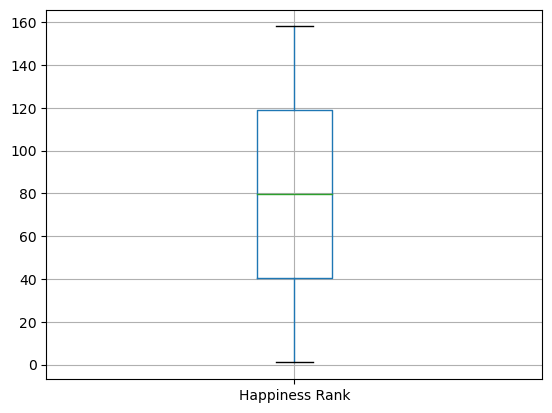

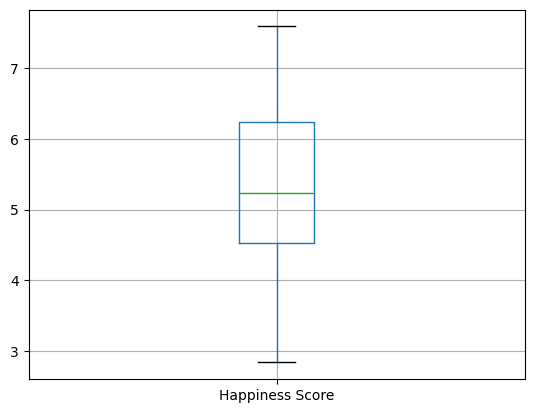

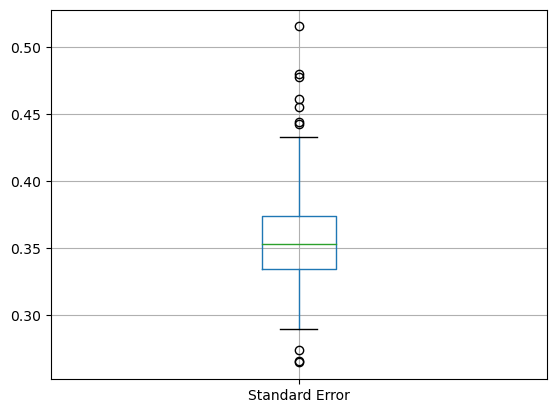

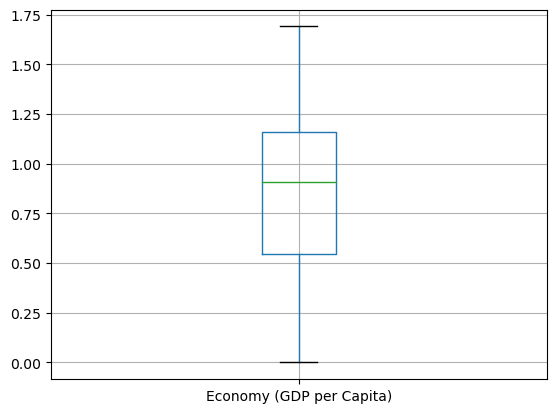

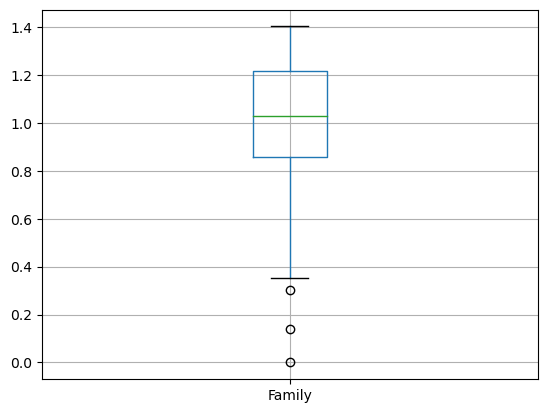

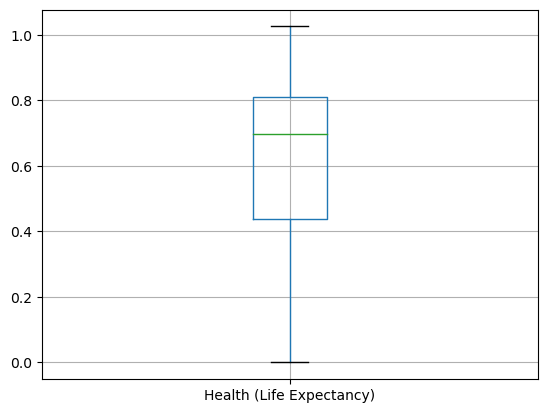

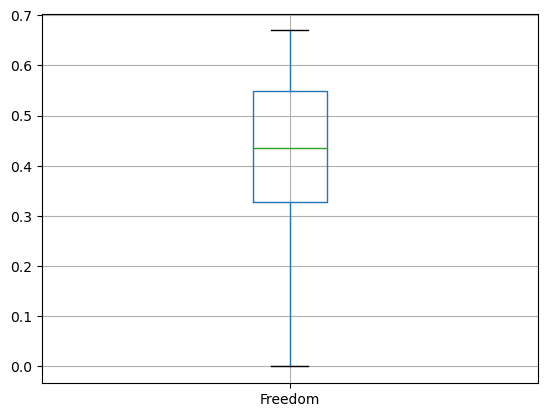

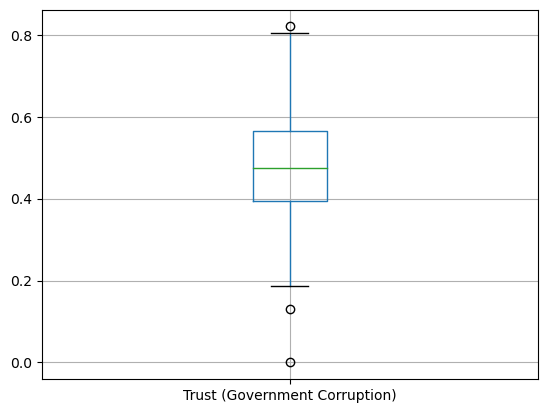

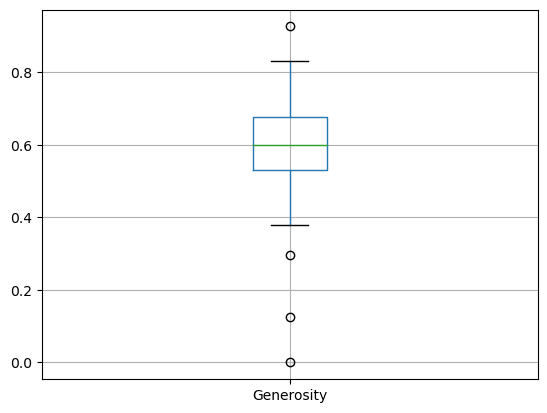

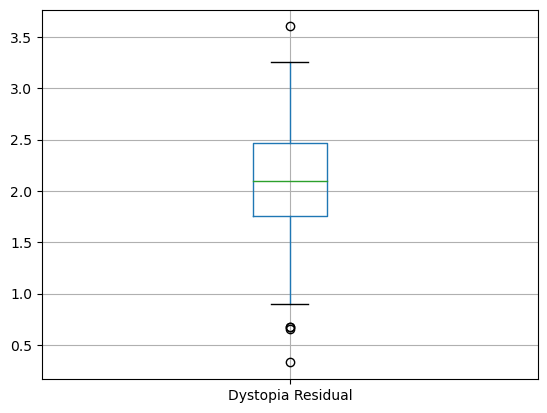

In [15]:
#To find the outliers with the help of boxplot:
for column in df1:
    plt.figure()
    df1.boxplot([column])

In [16]:
#To know corelation 
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.182211,-0.785267,-0.733644,-0.735613,-0.556886,-0.304207,-0.141914,-0.521999
Happiness Score,-0.992105,1.000000,-0.201754,0.780966,0.740605,0.724200,0.568211,0.326229,0.159029,0.530474
Standard Error,0.182211,-0.201754,1.000000,-0.224064,-0.132005,-0.321062,-0.159027,-0.158530,-0.054081,0.063299
Economy (GDP per Capita),-0.785267,0.780966,-0.224064,1.000000,0.645299,0.816478,0.370300,0.205482,-0.059576,0.040059
Family,-0.733644,0.740605,-0.132005,0.645299,1.000000,0.531104,0.441518,0.131653,0.066803,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.321062,0.816478,0.531104,1.000000,0.360477,0.149556,0.044395,0.018979
Freedom,-0.556886,0.568211,-0.159027,0.370300,0.441518,0.360477,1.000000,0.461105,0.398210,0.062783
Trust (Government Corruption),-0.304207,0.326229,-0.158530,0.205482,0.131653,0.149556,0.461105,1.000000,0.266991,0.010769
Generosity,-0.141914,0.159029,-0.054081,-0.059576,0.066803,0.044395,0.398210,0.266991,1.000000,-0.061511
Dystopia Residual,-0.521999,0.530474,0.063299,0.040059,0.148117,0.018979,0.062783,0.010769,-0.061511,1.000000


<Axes: >

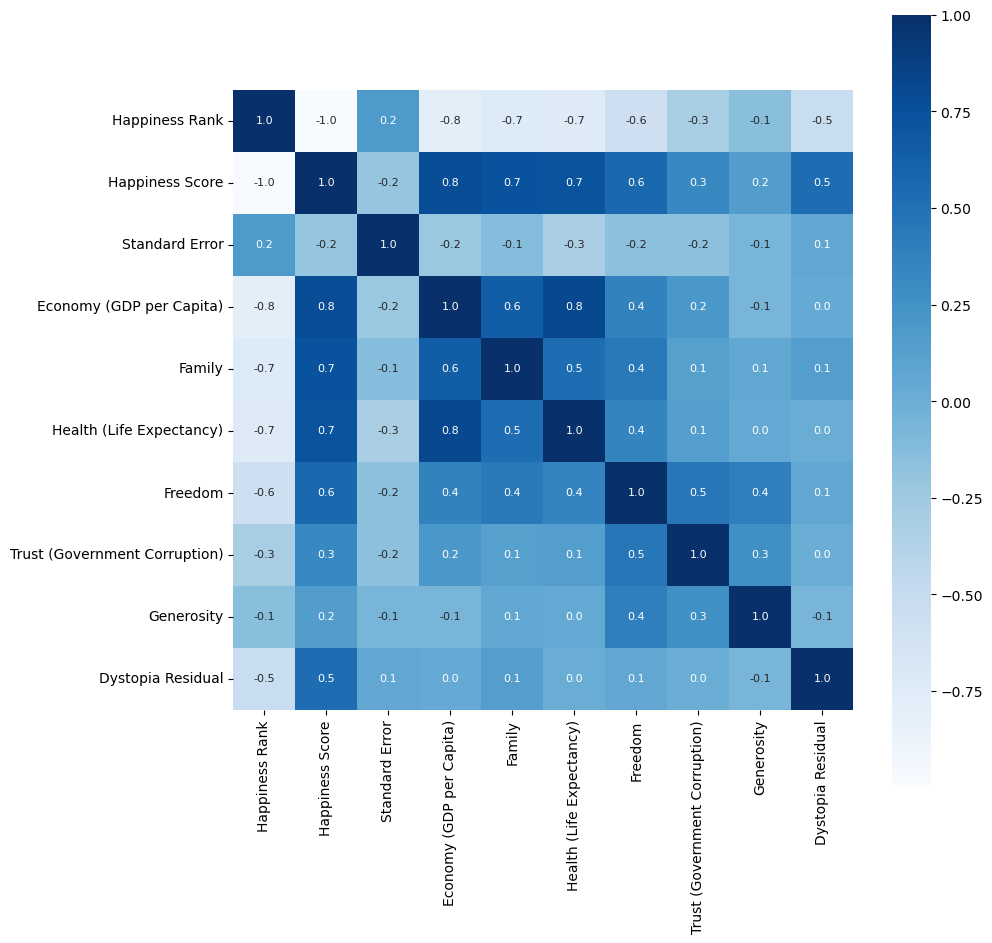

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,square=True,fmt=".1f",annot=True,annot_kws={"size":8},cmap='Blues')


From this observation we can say that for the happiness score the positive corelation columns are 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual') and for the negative corelation Standard Error column.

In [18]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

# 4)Encoding:

In [19]:
#Encoding with count Frequency Encoding:
df["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [20]:
len(df["Region"].unique())

10

In [21]:
#lets obtain the count for each category
a=df.Region.value_counts().to_dict()

In [22]:
#and now let's replace each label with its count.first we make dictionary that maps each label to the discounts
dict=df.Region.value_counts().to_dict()

In [23]:
dict

{'Sub-Saharan Africa': 40,
 'Central and Eastern Europe': 29,
 'Latin America and Caribbean': 22,
 'Western Europe': 21,
 'Middle East and Northern Africa': 20,
 'Southeastern Asia': 9,
 'Southern Asia': 7,
 'Eastern Asia': 6,
 'North America': 2,
 'Australia and New Zealand': 2}

In [24]:
#Tried this count frequency method but the count is also repeating for the other one so using the basic replacing function.

In [25]:
df.replace({
    "Region":{'Western Europe':0, 'North America':1, 'Australia and New Zealand':2,
       'Middle East and Northern Africa':3, 'Latin America and Caribbean':4,
       'Southeastern Asia':5, 'Central and Eastern Europe':6, 'Eastern Asia':7,
       'Sub-Saharan Africa':8, 'Southern Asia':9}},inplace=True)

In [26]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,0,1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,Iceland,0,2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,Denmark,0,3,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,Norway,0,4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,Canada,1,5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,8,154,3.465,0.325981,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,Benin,8,155,3.340,0.331896,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328
155,Syria,3,156,3.006,0.368771,0.66320,0.47489,0.72193,0.15684,0.573940,0.778484,0.32858
156,Burundi,8,157,2.905,0.442391,0.01530,0.41587,0.22396,0.11850,0.465116,0.582130,1.83302


In [27]:
df["Country"].unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

In [28]:
from sklearn import preprocessing 

In [29]:
label_encoder = preprocessing.LabelEncoder() #using the label encoder converting the text to numerical

In [30]:
df['Country']= label_encoder.fit_transform(df['Country']) 

In [31]:
df["Country"].unique()

array([135,  58,  37, 105,  24,  45,  99, 134, 100,   6,  64,  33,   7,
        91, 150,  18,  82,  63,  12, 148, 149, 106, 153, 123, 109,  49,
        27, 115,  46,   4,  36, 151,  29, 140, 119, 129,  88, 137,  73,
       132, 142,  42,  52, 152, 124,  68, 128,  40,   9,  65,  15,  92,
       110,  70, 125,  81, 101, 111,  11, 113,  86,  34,  80, 117,  67,
       104,  35,   2,  72, 145,  90,  56,  43,  60, 154, 144,  74, 103,
        14,   8, 107,  69,  94,  28, 156, 116, 121, 114,  76, 112, 126,
        95,  83,  96,   1,  16,  78,  39,  75,  93, 133,  51,  77,  57,
        55, 138, 143, 108,  10,  61, 147,  62, 127,  50, 157,  79,  59,
       131,  54,  32,  98,  44, 122,  89,  71,  38,   5,  17,  97,  48,
        85, 130,  23,  19,  41, 155,   3,  87,  31,  30, 146, 120,  47,
       102,  22, 139,  84,  25,  26,  53,  66,  20,   0, 118,  13, 136,
        21, 141])

In [32]:
len(df["Country"].unique())

158

In [33]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,0,1,7.587,0.324310,1.39651,1.34951,0.94143,0.66557,0.748756,0.667029,2.51738
1,58,0,2,7.561,0.365532,1.30232,1.40223,0.94784,0.62877,0.521036,0.758453,2.70201
2,37,0,3,7.527,0.321658,1.32548,1.36058,0.87464,0.64938,0.784910,0.698903,2.49204
3,105,0,4,7.522,0.338540,1.45900,1.33095,0.88521,0.66973,0.714677,0.702704,2.46531
4,24,1,5,7.427,0.328749,1.32629,1.32261,0.90563,0.63297,0.690742,0.770886,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.325981,0.22208,0.77370,0.42864,0.59201,0.820269,0.609371,0.67042
154,13,8,155,3.340,0.331896,0.28665,0.35386,0.31910,0.48450,0.431066,0.567327,1.63328
155,136,3,156,3.006,0.368771,0.66320,0.47489,0.72193,0.15684,0.573940,0.778484,0.32858
156,21,8,157,2.905,0.442391,0.01530,0.41587,0.22396,0.11850,0.465116,0.582130,1.83302


# 5)Splitting The Dataset Into Feature and Target:

In [34]:
#Importing the neccessary libraries and model for further creation of the model:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [35]:
X=df.drop(columns=["Happiness Score"])
Y=df["Happiness Score"]

pliting the data into train and test.Model will be built on training data and tested on test data.

In [36]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# 1)Linear Regression Model:

In [37]:
#Model instantiating and training
LR=LinearRegression() 
LR.fit(x_train,y_train)

LinearRegression()

In [38]:
#predicting for the x_test 
ytest_pred=LR.predict(x_test)

In [39]:
#predicting for the x_train
ytrain_pred=LR.predict(x_train)

In [40]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,ytrain_pred))
print("Mean Squared Error:",mean_squared_error(y_train,ytrain_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print("r2_score:",r2_score(y_true=y_train,y_pred=ytrain_pred))

For Traning Score:

Mean Absolute Error: 0.04358594089614881
Mean Squared Error: 0.003803274719334164
Root Mean Squared Error: 0.061670695790903514
r2_score: 0.9969498906659238


In [41]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_test,ytest_pred))
print("Mean Squared Error:",mean_squared_error(y_test,ytest_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,ytest_pred)))
print("r2_score:",r2_score(y_true=y_test,y_pred=ytest_pred))

For Testing Score:

Mean Absolute Error: 0.04895323223354424
Mean Squared Error: 0.0032124996531230424
Root Mean Squared Error: 0.05667891718375575
r2_score: 0.997839969797817


# 2:RANDOM FOREST REGRESSOR

In [42]:
#Model instantiating and training
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)


RandomForestRegressor()

In [43]:
#predicting for the x_test 
ytest_pred=RFR.predict(x_test)

In [44]:
#predicting for the x_train
y_train_pred=RFR.predict(x_train)

In [45]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,ytrain_pred))
print("Mean Squared Error:",mean_squared_error(y_train,ytrain_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print("r2_score:",r2_score(y_true=y_train,y_pred=ytrain_pred))

For Traning Score:

Mean Absolute Error: 0.04358594089614881
Mean Squared Error: 0.003803274719334164
Root Mean Squared Error: 0.061670695790903514
r2_score: 0.9969498906659238


In [46]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,ytest_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,ytest_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,ytest_pred)))
print("r2_score: ",r2_score(y_true=y_test,y_pred=ytest_pred))

For Testing Score:

Mean Absolute Error:  0.03626781250000016
Mean Squared Error:  0.002473084071875049
Root Mean Squared Error:  0.04973011232518029
r2_score:  0.9983371402756123


# 3: GRADIENT BOOSITNG ALGORITHM

In [47]:
#Model instantiating and training
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)


GradientBoostingRegressor()

In [48]:
#predicting for the x_test 
ytest_pred=GBR.predict(x_test)

In [49]:
#predicting for the x_train
y_train_pred=GBR.predict(x_train)

In [50]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,ytrain_pred))
print("Mean Squared Error:",mean_squared_error(y_train,ytrain_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print("r2_score:",r2_score(y_true=y_train,y_pred=ytrain_pred))

For Traning Score:

Mean Absolute Error: 0.04358594089614881
Mean Squared Error: 0.003803274719334164
Root Mean Squared Error: 0.061670695790903514
r2_score: 0.9969498906659238


In [51]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,ytest_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,ytest_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,ytest_pred)))
print("r2_score: ",r2_score(y_true=y_test,y_pred=ytest_pred))

For Testing Score:

Mean Absolute Error:  0.03597055816445069
Mean Squared Error:  0.00271601108892468
Root Mean Squared Error:  0.052115363271540954
r2_score:  0.998173800275484


# 4 :DECISION TREE REGRESSOR

In [63]:
#Model instantiating and training
deci_tree=DecisionTreeRegressor()
deci_tree.fit(x_train,y_train)


DecisionTreeRegressor()

In [64]:
#predicting for the x_test 
ytest_pred=deci_tree.predict(x_test)

In [65]:
#predicting for the x_train
y_train_pred=deci_tree.predict(x_train)

In [66]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,ytrain_pred))
print("Mean Squared Error:",mean_squared_error(y_train,ytrain_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print("r2_score:",r2_score(y_true=y_train,y_pred=ytrain_pred))

For Traning Score:

Mean Absolute Error: 0.04358594089614881
Mean Squared Error: 0.003803274719334164
Root Mean Squared Error: 0.061670695790903514
r2_score: 0.9969498906659238


In [67]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,ytest_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,ytest_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,ytest_pred)))
print("r2_score: ",r2_score(y_true=y_test,y_pred=ytest_pred))

For Testing Score:

Mean Absolute Error:  0.07174999999999995
Mean Squared Error:  0.008738312500000001
Root Mean Squared Error:  0.09347894147881651
r2_score:  0.9941245070959731


# 5 : LASSO REGRESSION

In [57]:
#Model instantiating and training
lasso=Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [68]:
#predicting for the x_test 
ytest_pred=lasso.predict(x_test)

In [69]:
#predicting for the x_train
y_train_pred=lasso.predict(x_train)

In [70]:
#Evalaution metrics:
print("For Traning Score:\n")
print("Mean Absolute Error:",mean_absolute_error(y_train,ytrain_pred))
print("Mean Squared Error:",mean_squared_error(y_train,ytrain_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_train,ytrain_pred)))
print("r2_score:",r2_score(y_true=y_train,y_pred=ytrain_pred))

For Traning Score:

Mean Absolute Error: 0.04358594089614881
Mean Squared Error: 0.003803274719334164
Root Mean Squared Error: 0.061670695790903514
r2_score: 0.9969498906659238


In [71]:
#Evalaution metrics:
print("For Testing Score:\n")
print("Mean Absolute Error: ",mean_absolute_error(y_test,ytest_pred))
print("Mean Squared Error: ",mean_squared_error(y_test,ytest_pred))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test,ytest_pred)))
print("r2_score: ",r2_score(y_true=y_test,y_pred=ytest_pred))

For Testing Score:

Mean Absolute Error:  0.12106250190179807
Mean Squared Error:  0.021461870196636038
Root Mean Squared Error:  0.14649870373705032
r2_score:  0.9855694030114532


# 7)Build a predictive model:

In [ ]:
From this models using the linear regression model to build a predictive system.
raw data= Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738 #collecting from rawadata
for switzerland-135, Western Europe=0

In [62]:
data=135,0,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
array=np.asarray(data)

In [72]:
final=array.reshape(1,-1)#reshaping the numpy array
prediction=LR.predict(final)

In [73]:
prediction #Value for happiness score model predicted

array([7.13576354])

In [ ]:
original happiness score: 7.587

In [ ]:
#End of the project 